# Intro

Please start by making your own copy of this Google Colab notebook. You can upload your finished version [here](https://drive.google.com/drive/folders/1DWh20xapA8DNRpFgwtXso0TpJhG8D5v0?usp=sharing). 

In this lab, we will modify a [mood model](https://www.sciencedirect.com/science/article/pii/S1364661315001746) in the literature to include an attention mechanism and show how [including attention can lead to different mood dynamics](https://www.sciencedirect.com/science/article/abs/pii/S0959438818300928?via%3Dihub). The idea of the original model is that mood can be thought of as a recency-weighted average of reward prediction errors. When prediction error is positive, mood increases, and when prediction error is negative, it decreases. What happens when people form expectations in environments in which states are not clearly defined? We can begin to answer this question in a simulation experiment in which a TDRL agent learns from a multi-cue environment and attends differently to each cue. 

Learning objectives:  

* Implement mood update in a TDRL context
* Implement mood-TDRL with attention
* Investigate mood dynamics under different attention conditions

The cell below imports some necessary modules:

In [ ]:
import numpy as np  
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set simulation parameters

In [ ]:
# mood instability parameter
# if f=0 mood does not bias reward perception 
# with f>0, mood exerts positive feedback, with reward perceived as larger in a good mood and as smaller in a bad mood 
# with f<0, mood corresponds to negative feedback, with reward perceived as smaller in a good mood and as larger in a bad mood
f = 1.5

n_timesteps = 10

eta_u = 0.1                   # learning rate 
eta_m = 0.5                   # mood update rate
v_init = np.array([-1, 1]);   # initial values of each cue; we assume that both cues are present in the environment at all times
phi = np.array([1, 0]);       # attention to each cue; this determines the extent to which the cue is part of the state 
h_init = 0;                   # initial mood

reward_sequence = [-1, 1, 1, -1, -1, -1, 1, 1, -1, 1]; 

#need to change phi for question 2

# Initialize output

In [ ]:
# Mood
M = []
M.append(np.tanh(h_init))

# Expectation
v = v_init
V = []
V_cues = []
V_cues.append(v_init)
V.append(np.dot(v,phi))

# Perceived reward
PR = []
PR.append(0) # no reward at t=0

# Reward prediction error
RPE = []
RPE.append(0) # no reward prediction error at t=0


# Run TDRL simulation for fixed number of timesteps

In [ ]:
for t in np.arange(n_timesteps):
    
  if t == 0:
    
    h = h_init     
    m = np.tanh(h) # compute initial mood
    v = v_init     # compute initial value

  # compute compound expected value weighted by attention
  v_compound = np.dot(v, phi)
  V.append(v_compound)  

  # perceive reward
  actual_reward = reward_sequence[t]
  perceived_reward = f*m + actual_reward
  PR.append(perceived_reward)

  # compute reward prediction error
  d = perceived_reward - v_compound
  RPE.append(d)

  # update expectation associated with each cue
  v = v + np.dot(eta_u*d, phi)
  V_cues.append(v)

  # update mood
  h = h + eta_m*(d-h)
  m = np.tanh(h)
  M.append(m)

# Visualize mood dynamics

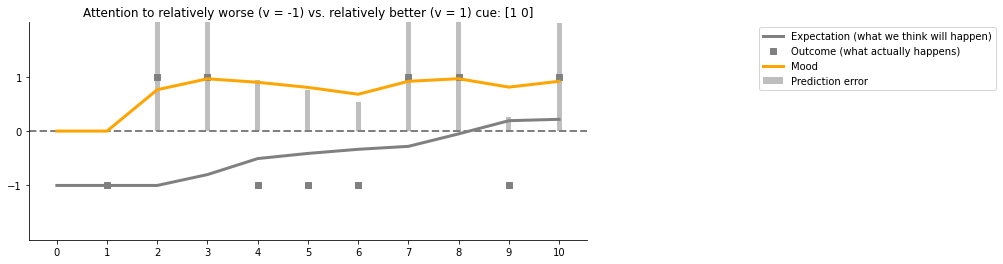

In [ ]:
timesteps = np.arange(n_timesteps+1)

fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.axhline(y=0, color='grey', linestyle='dashed', linewidth=2)
plt.title('Attention to relatively worse (v = -1) vs. relatively better (v = 1) cue: ' + str(phi))
plt.plot(timesteps, V, color='grey', linewidth=3, label="Expectation (what we think will happen)");
plt.plot(timesteps[-n_timesteps:], reward_sequence, color='grey', marker='s', linestyle='None', label="Outcome (what actually happens)");
plt.bar(timesteps, RPE, color='grey', width=0.1, alpha=0.5, label="Prediction error");
plt.plot(timesteps, M, color='orange', linewidth=3, label="Mood");
plt.legend(loc="best", bbox_to_anchor=(1.3, 1))
plt.ylim([-2, 2])
ax.set_xticks(timesteps)
ax.set_yticks([-1, 0, 1])
sns.despine();

# Exercises

**Question 1**

1. Examine the plot above. What is the effect on mood when the agent consistently pays attention to the relatively worse cue? 

- When an agent pays attention to the worse cue (has low expectations) the agent will have more positive prediction errors so their mood will increase on average.

**Question 2**

2. Modify the simulation to study what happens to mood when this attentional pattern reverses. That is, how does mood change when the agent consistently pays attention to the relatively better cue? (please include a revised plot in your answer).  


- When an agent pays attention to the better cue (has high expectations) the agent will have more negative prediction errors so their mood will decrease on average. See code/plot below:

In [ ]:
#### updating initial values for phi(A) = 0, phi(B) = 1

# mood instability parameter
# if f=0 mood does not bias reward perception 
# with f>0, mood exerts positive feedback, with reward perceived as larger in a good mood and as smaller in a bad mood 
# with f<0, mood corresponds to negative feedback, with reward perceived as smaller in a good mood and as larger in a bad mood
f = 1.5

n_timesteps = 10

eta_u = 0.1                   # learning rate 
eta_m = 0.5                   # mood update rate
v_init = np.array([-1, 1]);   # initial values of each cue; we assume that both cues are present in the environment at all times
phi = np.array([0, 1]);       # change this to focus attention on better cue
h_init = 0;                   # initial mood

reward_sequence = [-1, 1, 1, -1, -1, -1, 1, 1, -1, 1]; 

#keeping reward sequence, initial mood, learning rate, mood instability, and mood update rate the same

In [ ]:
# Mood
M = []
M.append(np.tanh(h_init))

# Expectation
v = v_init
V = []
V_cues = []
V_cues.append(v_init)
V.append(np.dot(v,phi))

# Perceived reward
PR = []
PR.append(0) # no reward at t=0

# Reward prediction error
RPE = []
RPE.append(0) # no reward prediction error at t=0

#this doesn't need to change for question 2

In [ ]:
#### Run TDRL simulation for phi(A) = 0, phi(B) = 1

for t in np.arange(n_timesteps):
    
  if t == 0:
    
    h = h_init     
    m = np.tanh(h) # compute initial mood
    v = v_init     # compute initial value

  # compute compound expected value weighted by attention
  v_compound = np.dot(v, phi)
  V.append(v_compound)  

  # perceive reward
  actual_reward = reward_sequence[t]
  perceived_reward = f*m + actual_reward
  PR.append(perceived_reward)

  # compute reward prediction error
  d = perceived_reward - v_compound
  RPE.append(d)

  # update expectation associated with each cue
  v = v + np.dot(eta_u*d, phi)
  V_cues.append(v)

  # update mood
  h = h + eta_m*(d-h)
  m = np.tanh(h)
  M.append(m)

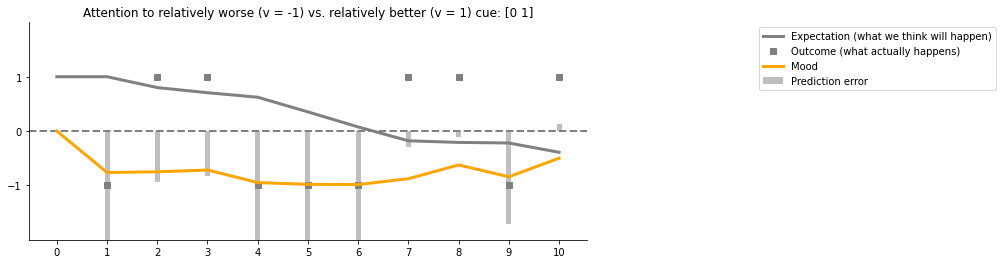

In [ ]:
##### plotting mood timecourse for phi(A) = 0, phi(B) = 1

timesteps = np.arange(n_timesteps+1)

fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.axhline(y=0, color='grey', linestyle='dashed', linewidth=2)
plt.title('Attention to relatively worse (v = -1) vs. relatively better (v = 1) cue: ' + str(phi))
plt.plot(timesteps, V, color='grey', linewidth=3, label="Expectation (what we think will happen)");
plt.plot(timesteps[-n_timesteps:], reward_sequence, color='grey', marker='s', linestyle='None', label="Outcome (what actually happens)");
plt.bar(timesteps, RPE, color='grey', width=0.1, alpha=0.5, label="Prediction error");
plt.plot(timesteps, M, color='orange', linewidth=3, label="Mood");
plt.legend(loc="best", bbox_to_anchor=(1.3, 1))
plt.ylim([-2, 2])
ax.set_xticks(timesteps)
ax.set_yticks([-1, 0, 1])
sns.despine();

- Plot shows that when agent's mood starts at the same initial value, is updated the same, and experiences the same reward sequence, mood is still considerably lower on average because of the accumulation of negative reward prediction errors. 

**Question 3**

3. Repeat the above, but this time allow the agent to attend equally to both cues. What is the effect on mood?    

- The agent has more stable mood fluctuations. The final mood value is similar to the initial mood value. The average mood rating is approximately zero. By focusing equal attention on the two cues, the agent experiences both positive and negative prediction errors that bring the mood rating back to zero. 

In [ ]:
#### updating initial values for phi(A) = 0.5, phi(B) = 0.5
# mood instability parameter
# if f=0 mood does not bias reward perception 
# with f>0, mood exerts positive feedback, with reward perceived as larger in a good mood and as smaller in a bad mood 
# with f<0, mood corresponds to negative feedback, with reward perceived as smaller in a good mood and as larger in a bad mood
f = 1.5

n_timesteps = 10

eta_u = 0.1                   # learning rate 
eta_m = 0.5                   # mood update rate
v_init = np.array([-1, 1]);   # initial values of each cue; we assume that both cues are present in the environment at all times
phi = np.array([0.5, 0.5]);   # change phi to set attention focus equal between two cues
h_init = 0;                   # initial mood

reward_sequence = [-1, 1, 1, -1, -1, -1, 1, 1, -1, 1]; 

#keeping reward sequence, initial mood, learning rate, mood instability, and mood update rate the same

In [ ]:
# Mood
M = []
M.append(np.tanh(h_init))

# Expectation
v = v_init
V = []
V_cues = []
V_cues.append(v_init)
V.append(np.dot(v,phi))

# Perceived reward
PR = []
PR.append(0) # no reward at t=0

# Reward prediction error
RPE = []
RPE.append(0) # no reward prediction error at t=0

#this doesn't need to change for question 2

In [ ]:
#### Run TDRL simulation for phi(A) = 0.5, phi(B) = 0.5

for t in np.arange(n_timesteps):
    
  if t == 0:
    
    h = h_init     
    m = np.tanh(h) # compute initial mood
    v = v_init     # compute initial value

  # compute compound expected value weighted by attention
  v_compound = np.dot(v, phi)
  V.append(v_compound)  

  # perceive reward
  actual_reward = reward_sequence[t]
  perceived_reward = f*m + actual_reward
  PR.append(perceived_reward)

  # compute reward prediction error
  d = perceived_reward - v_compound
  RPE.append(d)

  # update expectation associated with each cue
  v = v + np.dot(eta_u*d, phi)
  V_cues.append(v)

  # update mood
  h = h + eta_m*(d-h)
  m = np.tanh(h)
  M.append(m)

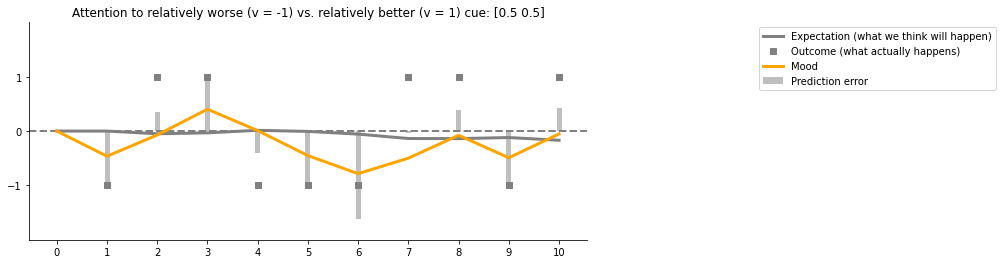

In [ ]:
##### plotting mood timecourse for phi(A) = 0.5, phi(B) = 0.5

timesteps = np.arange(n_timesteps+1)

fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.axhline(y=0, color='grey', linestyle='dashed', linewidth=2)
plt.title('Attention to relatively worse (v = -1) vs. relatively better (v = 1) cue: ' + str(phi))
plt.plot(timesteps, V, color='grey', linewidth=3, label="Expectation (what we think will happen)");
plt.plot(timesteps[-n_timesteps:], reward_sequence, color='grey', marker='s', linestyle='None', label="Outcome (what actually happens)");
plt.bar(timesteps, RPE, color='grey', width=0.1, alpha=0.5, label="Prediction error");
plt.plot(timesteps, M, color='orange', linewidth=3, label="Mood");
plt.legend(loc="best", bbox_to_anchor=(1.3, 1))
plt.ylim([-2, 2])
ax.set_xticks(timesteps)
ax.set_yticks([-1, 0, 1])
sns.despine();

**Question 4**

4. Based on your simulations, list at least two behavioral interventions you might try to teach an agent to regulate their own mood.  

- An agent should pay attention equally to positive and negative stimuli. Phi for both should be 0.5. Whenever an agent expects something negative, the agent should try to expect soemthing positive next time.
- Pessimistic agents have higher overall mood scores, which is generally a positive experience. If an agent wants to increase their average mood, the agent should view things from a pesimisstic point of view so they experience more positive prediction errors. In real world applications this is less useful because it could be damaging to a patient in other ways to think pesimistically. 

**Question 5**

5. In this simplified environment, the agent is distributing attention over only two cues. In the real world, lots of cues compete for our attention, so we often have to decide what to pay attention to. One observation is that people tend to distribute attention in a *mood-congruent* way: that is, when in a good mood, they attend to positive expectations, and when in a bad mood, they attend to negative expectations. Modify the simulation above to implement *mood-congruent attention*. How does this change the answers to (1) and (2), if at all? 

- I updated the simulation code to switch phi to either the better cue (if mood is good), worse cue (if mood is bad), or equal (if mood = 0). This changes the agent's mood response to prediction errors and keeps the agent more stable within a state, meaning that if mood is good, the agent is more likely to keep mood high after experiencing positive prediction errors. An agent changes states more often because the agent's expected value of a state is dependent on where their attention is, which is dependent on the outcome of the previous trial (because mood will change depending on previous trial). Likewise, when an agent's mood is bad and the agent experiences negative prediction errors, the agent's mood will remain bad. Unlike before when the agent's attention was static so their expected value remained low or high depending on their initial attention, a mood congruent agent will change their expected value based on outcome and therefore will fluctuate between both low and high mood states, rather than stable low or high states. 

In [ ]:
##### modifying simulation for 'mood-congruent attention'
  #starting with phi(A) = 0.5, phi(B) = 0.5
# mood instability parameter
# if f=0 mood does not bias reward perception 
# with f>0, mood exerts positive feedback, with reward perceived as larger in a good mood and as smaller in a bad mood 
# with f<0, mood corresponds to negative feedback, with reward perceived as smaller in a good mood and as larger in a bad mood
f = 1.5 #keeping this the same - want positive feedback for both +/- PEs

n_timesteps = 10

eta_u = 0.1                   # learning rate 
eta_m = 0.5                   # mood update rate
v_init = np.array([-1, 1]);   # initial values of each cue; we assume that both cues are present in the environment at all times
phi = np.array([0.5, 0.5]);   # Just initial value -- going to update in simulation
h_init = 0;                   # initial mood

reward_sequence = [-1, 1, 1, -1, -1, -1, 1, 1, -1, 1]; 


In [ ]:
### initializing params
# Mood
M = []
M.append(np.tanh(h_init))

# Expectation
v = v_init
V = []
V_cues = []
V_cues.append(v_init)
V.append(np.dot(v,phi)) #initial expectation depends on phi

# Perceived reward
PR = []
PR.append(0) # no reward at t=0

# Reward prediction error
RPE = []
RPE.append(0) # no reward prediction error at t=0


In [ ]:
#### Run TDRL simulation for mood congruent agent

for t in np.arange(n_timesteps):
    
  if t == 0:
    
    h = h_init     # initial mood = 0
    m = np.tanh(h) # compute initial mood
    v = v_init     # compute initial value
    phi = np.array([0.5, 0.5]); #when mood is zero, attention is equal

  if m > 0:
    phi = np.array([0, 1]); #if mood is good, attend to better stimulus
  elif m < 0:
    phi = np.array([1, 0]); #if mood is bad, attend to worse stimulus
  else:
    phi = np.array([0.5, 0.5]); # if mood goes back to zero - attention is equal
  
  # update expected value based on attention
  v_compound = np.dot(v, phi) #updating value with attention 
  V.append(v_compound)   #updates EV

  # perceive reward 
  actual_reward = reward_sequence[t] 
  perceived_reward = f*m + actual_reward #reward is dependent on f and m 
  PR.append(perceived_reward) #updates perceived reward

  # compute reward prediction error
  d = perceived_reward - v_compound #rpe is difference in perceived reward (dependent on mood) and EV (dependent on attention)
  RPE.append(d) #updates rpe

  # update expectation associated with each cue
  v = v + np.dot(eta_u*d, phi)
  V_cues.append(v) #updates expectation for cue

  # update mood 
  h = h + eta_m*(d-h) #mood changes by initial mood, mood update rate, rpe - initial mood
  m = np.tanh(h) #normalizes mood
  M.append(m) #updates mood

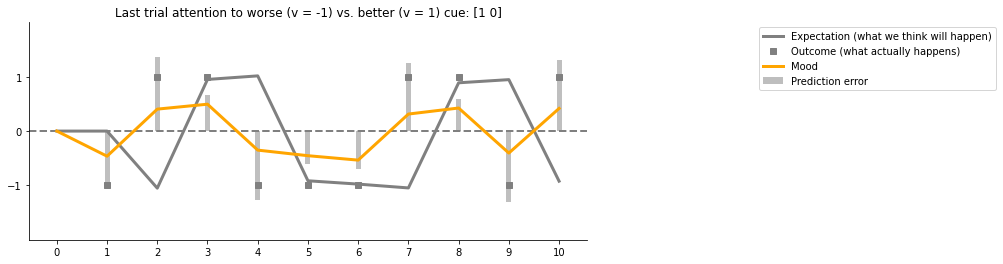

In [ ]:
##### plotting mood timecourse for phi(A) = 0.5, phi(B) = 0.5

timesteps = np.arange(n_timesteps+1)

fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.axhline(y=0, color='grey', linestyle='dashed', linewidth=2)
plt.title('Last trial attention to worse (v = -1) vs. better (v = 1) cue: ' + str(phi))
plt.plot(timesteps, V, color='grey', linewidth=3, label="Expectation (what we think will happen)");
plt.plot(timesteps[-n_timesteps:], reward_sequence, color='grey', marker='s', linestyle='None', label="Outcome (what actually happens)");
plt.bar(timesteps, RPE, color='grey', width=0.1, alpha=0.5, label="Prediction error");
plt.plot(timesteps, M, color='orange', linewidth=3, label="Mood");
plt.legend(loc="best", bbox_to_anchor=(1.3, 1))
plt.ylim([-2, 2])
ax.set_xticks(timesteps)
ax.set_yticks([-1, 0, 1])
sns.despine();